In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [10]:
# Generating related input and output data

np.random.seed(0)

x, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_repeated=0, n_classes=2, n_clusters_per_class=1)

In [11]:
# Define all dimensions

m = x.shape[0]  # (#training examples)
n = x.shape[1]  # (#features)
N = 3           # (#Neuron units in second layer)
N_ = 1          # (#Neuron unit in last layer)
L = 2           # (#Number of layers including output layer)
print(m, n, N, N_)

1000 2 3 1


In [12]:
# Reshaping the input and output train data

x = x.reshape(n, m)
y = y.reshape(N_, m)
print(x.shape, y.shape)

(2, 1000) (1, 1000)


In [13]:
# Dictionaries containing information for each layer

A = {}           # Containing activation units
W = {}           # Containing weights
Z = {}           # Containing z units
B = {}           # Containing bias
dZ = {}          # Containing dE / dz
dW = {}          # Containing dE / dw
dB = {}          # Containing dE / db

# First layer neuron units
A[1] = x


# First layer weights
W[1] = random_initialization(N,n)

# Second layer weights
W[2] = random_initialization(N_,N)

# First layer bias
B[1] = np.zeros((3, 1))

# Second layer bias
B[2] = np.zeros((1, 1))

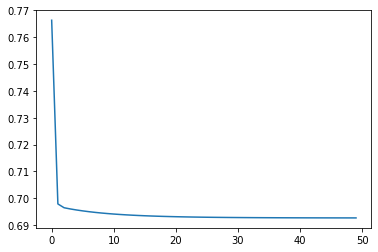

In [14]:
epoch = 50

alpha = 2

plotcost_func = np.zeros((1, epoch))

for i in range(epoch):
    
    # Doing forward propagation
    forward_prop()
    
    
    y_hat = calculate_activation_unit(calculate_z(A.get(2), W.get(2), B.get(2)))
    
    
    np.where

    # Cost(loss) of shape(1, # samples)
    cost = ((-1) * y * (np.log(y_hat))) - ((1 - y) * (np.log(1 - y_hat)))

    # Cost Function (a scalar value)
    cost_func = (np.sum(cost)) / m

    plotcost_func[0, i] = cost_func
    
    # Doing backward propagation
    backward_prop()
    
    
    # Updating Weights and Bias
    
    W[1] = W[1] - alpha * dW[2]
    W[2] = W[2] - alpha * dW[3]
    
    B[1] = B[1] - alpha * dB[2]
    B[2] = B[2] - alpha * dB[3]
    
    
plt.plot([i for i in range(epoch)], plotcost_func[0,:])

In [15]:
# Random Initialization for weights (between -1 and 1)
def random_initialization(d1, d2):
    
    for i in range(d1*d2):
        
        # Random number between -1 and 1
        arr = np.random.uniform(-1,1, size=(d1, d2))
        
    return arr



# Calculating z 
def calculate_z(a, w, b):
    
    z = np.dot(w, a) + b
    
    return z



# Calculating activation unit
def calculate_activation_unit(z):
    
    a = 1 / (1 + np.exp(-z))
    
    return a



# Derived activation 
def derived_activation(a):
    
    return(a * (1 - a))



# Forward Propagation 
def forward_prop():
    
    for i in range(2, L+2):
        
        # (#Neuron units in 2nd layer, #Number of features) for 2nd layer
        # (#Neuron units in last layer, #Number of features) for last layer
        Z[i] = calculate_z(A.get(i-1), W.get(i-1), B.get(i-1))
        
        # (#Neuron units in 2nd layer, #Number of features) for 2nd layer
        # (#Neuron units in last layer, #Number of features) for last layer
        A[i] = calculate_activation_unit(Z.get(i))




# Backward Propagation
def backward_prop():
    
    # dE/dz for last layer
    dZ[L+1] = A.get(L+1) - y  #(#Neuron units in last layer, #Number of features)
    
    
    # dE/dw for last layer
    dW[L+1] = (np.dot(dZ[L+1], A.get(L).T))/ m  #(#Neuron units in last layer, #Neuron units in 2nd layer)
               
    
    # dE/db for last layer
    dB[L+1] = (np.sum(dZ[L+1], axis=1)) / m  #(1, 1)
    
    i = L #Number of layers
    
    while i>1:
        
        # dE/dz for layers before last
        dZ[i] = (np.dot(W.get(i).T, dZ.get(i+1))) * (derived_activation(A.get(i)))
               
        
        # dE/dw for layers before last
        dW[i] = (np.dot(dZ.get(i), A.get(i-1).T)) / m
               
               
        # dE/db
        dB[i] = (np.sum(dZ.get(i), axis=1, keepdims=True)) / m
         
        i = i - 1